In [11]:
import numpy as np


def get_cov(sdx=1., sdy=1., rotangdeg=0.):
    covar = np.array([[sdx, 0], [0, sdy]])
    rot_ang = rotangdeg / 360 * 2 * np.pi
    rot_mat = np.array([[np.cos(rot_ang), -np.sin(rot_ang)], [np.sin(rot_ang), np.cos(rot_ang)]])

    covar = np.matmul(np.matmul(rot_mat, covar), rot_mat.transpose())
    return covar


def gen_circular_distribution(n=500, scale=1):
    a = np.round(n / 7).astype('int')
    b = np.round(2*n / 7).astype('int')
    c = n - a - b
    r1 = np.concatenate(
        [np.random.normal(loc=2, scale=scale, size=[a, 1]), np.random.normal(loc=8, scale=scale, size=[c, 1])])
    r2 = np.random.normal(loc=5, scale=scale, size=[b, 1])

    th1 = np.random.uniform(low=0, high=2 * np.pi, size=[a+c, 1])
    th2 = np.random.uniform(low=0, high=2 * np.pi, size=[b, 1])

    x1a = r1 * np.cos(th1)
    x2a = r1 * np.sin(th1)

    x1b = r2 * np.cos(th2)
    x2b = r2 * np.sin(th2)

    X = np.concatenate([np.concatenate([x1a.reshape([a+c, 1]), x1b.reshape([b, 1])]),
                        np.concatenate([x2a.reshape([a+c, 1]), x2b.reshape([b, 1])])], axis=1)

    y = np.concatenate([np.zeros([a+c, 1]), np.ones([b, 1])]).squeeze()
    return X, y


def gen_simple_circular_distribution(n=100, scale=1):
    a = np.round(n/3).astype('int')
    b = n-a
    r1 = np.random.normal(loc=0, scale=scale, size=[a, 1])
    r2 = np.random.normal(loc=5, scale=scale, size=[b, 1])

    th1 = np.random.uniform(low=0, high=2 * np.pi, size=[a, 1])
    th2 = np.random.uniform(low=0, high=2 * np.pi, size=[b, 1])

    x1a = r1 * np.cos(th1)
    x2a = r1 * np.sin(th1)

    x1b = r2 * np.cos(th2)
    x2b = r2 * np.sin(th2)

    X = np.concatenate([np.concatenate([x1a.reshape([a, 1]), x1b.reshape([b, 1])]),
                        np.concatenate([x2a.reshape([a, 1]), x2b.reshape([b, 1])])], axis=1)

    y = np.concatenate([np.zeros([a, 1]), np.ones([b, 1])]).squeeze()
    return X, y


def gen_xor_distribution(n=100):
    a = np.round(n / 4).astype('int')
    b = n-a*3
    xc1 = np.concatenate([np.random.multivariate_normal([-2.3, -2.3], get_cov(0.4, 0.1, -45), a),
                          np.random.multivariate_normal([2.3, 2.3], get_cov(0.4, 0.1, -45), a)])
    xc2 = np.concatenate([np.random.multivariate_normal([-2.3, 2.3], get_cov(0.4, 0.1, 45), a),
                          np.random.multivariate_normal([2.3, -2.3], get_cov(0.4, 0.1, 45), b)])
    xc = np.array(np.concatenate([xc1, xc2]))

    y = np.array(np.concatenate([np.zeros([2 * a, 1]), np.ones([a+b, 1])])).squeeze()
    X = xc
    return X, y
    
# function for generating the meshgrid for plots
def gen_sample_grid(npx = 200, npy = 200, limit =4):
  x1line = np.linspace(-limit,limit, npx)
  x2line = np.linspace(-limit,limit, npy)

  x1grid, x2grid = np.meshgrid(x1line, x2line)

  # produce an grid array with all grid values
  xgrid = np.array([x1grid, x2grid]).reshape([2,npx*npy]).T

  return xgrid, x1line, x2line


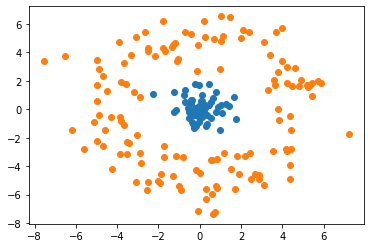

In [26]:
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
x, y = gen_simple_circular_distribution(n=200, scale=1)

# plot feature points
ax.scatter(x[y==0, 0],x[y==0,1])
ax.scatter(x[y==1, 0],x[y==1,1])
plt.show()

Epoch 1/250
7/7 [==============================] - 0s 2ms/step - loss: 0.5159
Epoch 2/250
7/7 [==============================] - 0s 3ms/step - loss: 0.5071
Epoch 3/250
7/7 [==============================] - 0s 2ms/step - loss: 0.4983
Epoch 4/250
7/7 [==============================] - 0s 3ms/step - loss: 0.4907
Epoch 5/250
7/7 [==============================] - 0s 2ms/step - loss: 0.4844
Epoch 6/250
7/7 [==============================] - 0s 2ms/step - loss: 0.4782
Epoch 7/250
7/7 [==============================] - 0s 3ms/step - loss: 0.4721
Epoch 8/250
7/7 [==============================] - 0s 2ms/step - loss: 0.4670
Epoch 9/250
7/7 [==============================] - 0s 4ms/step - loss: 0.4623
Epoch 10/250
7/7 [==============================] - 0s 3ms/step - loss: 0.4578
Epoch 11/250
7/7 [==============================] - 0s 2ms/step - loss: 0.4535
Epoch 12/250
7/7 [==============================] - 0s 2ms/step - loss: 0.4499
Epoch 13/250
7/7 [==============================] - 0s 3ms/st

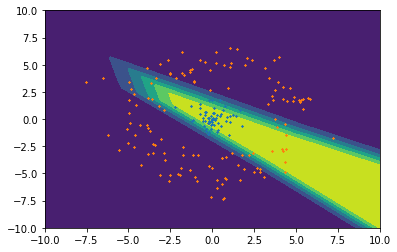

In [27]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(units=4, activation='relu', input_dim=2)) 
model.add(Dense(units=4, activation='relu')) 
model.add(Dense(units=2, activation='softmax')) 

model.compile(loss='categorical_crossentropy', optimizer='sgd')

from tensorflow.keras.utils import to_categorical
y_binary = to_categorical(y)

model.fit(x, y_binary, epochs=250, batch_size=32)

npx = 200
npy = 200
Xgrid, X1line, X2line = gen_sample_grid(npx, npy, limit = 10)
y_pred = model.predict(Xgrid)
y_pred = np.reshape(y_pred[:,0], [npx,npy])  #reshape

import matplotlib.pyplot as plt
fig, ax = plt.subplots()

plt.contourf(X1line, X2line, y_pred)
ax.scatter(x[y==0, 0],x[y==0,1], marker="x", s=2)
ax.scatter(x[y==1, 0],x[y==1,1], marker="x", s=2)
plt.show()




In [28]:
# Generate validation set
x_val, y_val = gen_simple_circular_distribution(n=1000, scale=1)
y_model = model.predict(x_val)
y_model = np.argmax(y_model, axis=-1)

nTot = len(y_val) 
nMatch = 0 
for i in range(len(y_val)):
  if y_val[i] == y_model[i]:
    nMatch += 1
print("With Validation data -- Accuracy: ", 100 * nMatch / nTot, "%")

With Validation data -- Accuracy:  86.1 %
